# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Откроем файл с данными и изучим общую информацию.
Для этого импортируем необходимые библиотеки.

In [ ]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv')

print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Видим, что данные в файле записаны через разделитель, прочитаем данные указав разделителем `\t`

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head(15))
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

 Совсем другой вид!
 Обратим внимание на данные, очевидные проблемы:
 - пропуски. Они присутсвуют практически во всех столбцах и обозначены как `NaN`. С их природой еще предстоит разобраться, а также решить, что с ними делать.
 - формат ячеек. Многие числовые ячейки можно было бы привести к целочисленному формату.
 - формат даты в столбце `first_day_exposition` требует корректировки.

### Вывод

Для того, чтобы перейти к полноценному иследованию, для начала необходимо обработать данные и устранить все указанные проблемы. Займемся этим в следующем пункте.

## Предобработка данных

Для начала приведем в порядок формат даты.
Приведем дату в формат `%Y-%m-%dT%H:%M:%S`.

Кроме того, столбец `first_day_exposition` содержит данные по дате публикации, поэтому в этом формате нам не важно время, да и в данных оно отображается как `00:00:00`, а значит, мы можем округлить дату до дня.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1D')

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь поработаем с форматом ячеек.
Очевидно, что столбцы `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` - содержащие количество этажей в доме, количество балконов, число парков в радиусе 3 км, число водоемов в радиусе 3 км, число дней от публикации до снятия, соотвественно, являются целочисленными, а значит, тип ячеек можно к целочисленному типу.

In [ ]:
for i in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[i] = data[i].astype('Int64',errors='ignore')
display(data.head())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around3

 Изменились все столбцы кроме `days_exposition`, интересно почему метод не сработал для этого столбца, попробуем это выяснить.
 Возможно, данные этого столбца все же имеют знаки после запятой? Проверим. 
 Найдем количество значений дающих не нулевой результат при делении на 0.

In [ ]:
(data['days_exposition'].mod(1)>0).sum()

3997

Вот и результат.

3997 значений где-то далеко после запятой имеют значение.
А значит, данные этого столбца нужно округлить.

In [ ]:
data['days_exposition'] = data['days_exposition'].round(0)
data['days_exposition'] = data['days_exposition'].astype('Int64',errors='ignore')
display(data.head())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around3

Ну вот, другое дело. Со столбцом `days_exposition` справились. 
Смотрим дальше.

Данные в столбцах `last_price` - Последняя цена, `airports_nearest` - Расстояние до ближайшего аэропорта, `cityCenters_nearest` - Расстояние до центра города, `parks_nearest` - Расстояние до ближайшего парка, `ponds_nearest` - Расстояние до ближайшего водоема, хотя по сути своей не являются целочисленными, но по наблюдениям не имеют дробной части. 

Проверим это.

In [ ]:
for i in ['last_price', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
    print((data[i].mod(1)>0).sum())

0
0
0
0
0


Как я и предполагала, после запятой у всех этих значений нет чисел, а значит эти столбцы тоже могут быть переведены в формат `int`.

In [ ]:
for i in ['last_price', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
    data[i] = data[i].astype('Int64')
display(data.head())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000     

С типами данных в таблице разобрались.

Теперь настало время разобраться с пропусками.
Посчитаем пропуски в столбцах, чтобы оценить масштаб.

In [ ]:
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Очевидно, что хуже всего дела обстоят в столбце с меткой Апартаменты. Возможно, люди не до конца понимают в чем разница?

Далее идут пропуски в столбцах Расстояний до парков и водоемов, Количество балконов и Высота потолков.
Чуть меньше пропусков в столбцах Количество парков и водоемов в радиусе 3 км и Количество дней в продаже.

И если в целом, все эти параметры являются скорее дополнительными к сути объявляния о продаже, а столбец `days_exposition` может иметь пропуск лишь потому, что объявление еще не закрыто, то пропуск данных из столбцов в конце списка: Площадь кухни, Жилая площадь, Количество этажей и особенно Название населенного пункта - действительно заставляют засомневаться в адекватности объявления.

Проверим объявления, в которых не указано Название населенного пункта.

In [ ]:
display(data[data['locality_name'].isna() == True].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.7,2016-04-15,3,3.55,5,50.8,2,NaN,...,8.8,0,NaN,23478,4258,0,NaN,0,NaN,147
2033,6,5398000,80.0,2017-05-30,3,NaN,4,42.6,2,NaN,...,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2603,20,3351765,42.7,2015-09-20,1,NaN,24,15.6,3,NaN,...,10.7,0,NaN,22041,17369,0,NaN,1,374,276
2632,2,5130593,62.4,2015-10-11,2,NaN,24,33.1,21,NaN,...,8.2,0,NaN,22041,17369,0,NaN,1,374,256
3574,10,4200000,46.5,2016-05-28,2,NaN,5,30.8,5,NaN,...,6.5,0,NaN,27419,8127,0,NaN,1,603,45


В целом ничего не привлекает внимания. 
Обычные данные, только без города.
Но город является одним из самых важных параметров объявления, поэтому строки с пропусками можно попросту удалить.

In [ ]:
data.dropna(subset = ['locality_name'], inplace = True)
display(data[data['locality_name'].isna() == True].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Столбец Aппартаменты содержит больше всего пропусков.
Из 23699 строк мы имеем 20924. Стоит вопрос: а нужны ли нам вообще эти данные?
На мой взгляд, если этот столбец имеет более 88% пропусков, то он абсолютно не информативен для нас и мы спокойно можем от него избавиться.

In [ ]:
data.drop(axis='columns', columns = ['is_apartment'], inplace = True)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121


Отсутствующие данные в столбцах Количество балконов и Количество парков и водоемов в радиусе 3 км можно заменить на 0, так как если человек не указал эти параметры в объявлении, то скорее всего они отсуствуют.

In [ ]:
for i in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[i]=data[i].fillna(0)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289


Остальные данные мы не можем заменить на фиксированные значения, так как Расстояние до ближайших до парков и водоемов, Число дней в продаже - точно какое-то есть, но какое оно, нам не известно. Данные отсуствуют.
Можно попробовать заменить их какими-то среднестатистическими, но для нашего исследования этого не потребуется.



По заданию от нас требуется расчет соотнашения жилой и общей площади, а также отношение площади кухни к общей площади. Логично, что мы не сможем выполнить эти расчеты для строк с отсутствующими значениями площади кухни и жилой площади.
Также нам необходимо определить не является ли этаж квартиры последним, а для этого, нам нужно знать этажность дома.

Объявлений, в которых не указано количество общее этажей в доме всего 84, поэтому для них можно ничего не придумывать, а просто удалить их.

In [ ]:
data.dropna(subset = ['floors_total'], inplace = True)
data.isna().sum().sort_values(ascending = False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area             2222
living_area              1865
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
floors_total                0
open_plan                   0
floor                       0
studio                      0
balcony                     0
locality_name               0
parks_around3000            0
ponds_around3000            0
total_images                0
dtype: int64

Так как мы производили удаление строк, теперь нужно исправить индексацию таблицы. Перезапишем индексы.

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN
23561,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45
23562,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23563,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602


А вот пропусков в площади кухонь и жилой площади достаточно много.
Попробуем расчитать отношение медианы жилой площади к медиане общей и заполнить пропуски умножая общую площадь на полученный коэфициент.
Но не сделаем это группируя квартиры по количеству комнат.

Для начала сгруппируем объявления по количеству комнат и расчитаем медианы, а также их отношение.

In [ ]:
area_median_koeff = pd.DataFrame()

area_median_koeff['median_kitchen'] = data.groupby('rooms')['kitchen_area'].median()

area_median_koeff['median_living'] = data.groupby('rooms')['living_area'].median()

area_median_koeff['median_total'] = data.groupby('rooms')['total_area'].median()

area_median_koeff['koeff_kitchen'] = area_median_koeff['median_kitchen']/area_median_koeff['median_total']

area_median_koeff['koeff_living'] = area_median_koeff['median_living']/area_median_koeff['median_total']

display(area_median_koeff)

,median_kitchen,median_living,median_total,koeff_kitchen,koeff_living
rooms,,,,,
0,NaN,18.000,26.075,NaN,0.690316
1,9.00,17.600,36.600,0.245902,0.480874
2,8.70,30.500,53.000,0.164151,0.575472
3,9.50,45.000,72.800,0.130495,0.618132
4,11.00,63.650,99.300,0.110775,0.640987
5,15.10,91.785,146.000,0.103425,0.628664
6,19.75,124.400,186.150,0.106097,0.668278
7,20.00,145.000,214.000,0.093458,0.677570
8,25.00,161.000,235.700,0.106067,0.683072


Теперь заполним пропуски перемножив общую площадь на полученный коэффициент для жилой площади и кухни соотвественно.

In [ ]:
for i in range(len(data['kitchen_area'])):
    if data['kitchen_area'].isna()[i] == True:
        for j in area_median_koeff.index:
            if data.loc[i, 'rooms'] == j:
                data.loc[i, 'kitchen_area'] = data.loc[i, 'total_area'] * area_median_koeff.loc[j, 'koeff_kitchen']

    if data['living_area'].isna()[i] == True:
        for j in area_median_koeff.index:
            if data.loc[i, 'rooms'] == j:
                data.loc[i, 'living_area'] = data.loc[i, 'total_area'] * area_median_koeff.loc[j, 'koeff_living']                
                
data.isna().sum().sort_values(ascending = False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area              194
living_area                 0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
floors_total                0
open_plan                   0
floor                       0
studio                      0
balcony                     0
locality_name               0
parks_around3000            0
ponds_around3000            0
total_images                0
dtype: int64

В столбце площадь кухни все еще есть пропуски.
Они образовались из объявлений, где количество комнат 0.
Поэтому логично предположить, что площадь кухни и будет общей площадью.

In [ ]:
for i in range(len(data['rooms'])):
    if data.loc[i, 'rooms'] == 0:
        data.loc[i, 'kitchen_area'] = data.loc[i, 'total_area']
        
data.isna().sum().sort_values(ascending = False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
living_area                 0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
floors_total                0
open_plan                   0
floor                       0
studio                      0
kitchen_area                0
balcony                     0
locality_name               0
parks_around3000            0
ponds_around3000            0
total_images                0
dtype: int64

Произвели предобработку данных. Избавилась от критических для расчета пропусков, а так же данных не несущих ценностей. Произвели замену значений на нулевые, там где это возможно, а также заполнили недостающие данные в столбцах площади кухни и жилой площади с применением медиан и коэффициентов. Изменили типы данных и привели индейсы в порядок.

## Расчёты и добавление результатов в таблицу

От нас требуется произвести расчеты и добавить в таблицу следующие параметры:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Начнем с цены квардартного метра.
Для того, чтобы расчитать его, необходимо разделить цену квартины на общую площадь.
Добавить новый столбец и записать в него расчитаное значение для каждого объявления.

In [ ]:
data['price_square_meter'] = (data['last_price']/data['total_area']).round(0)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,98.282967,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.0


Из данных о дате публикации можно вычленить день недели, месяц и год и добавить из в новые соотсветсующие столбцы.

In [ ]:
data['weekday_exp'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exp,month_exp,year_exp
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028,1,482,2,755,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,18603,0,NaN,0,NaN,81,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,13933,1,90,2,574,558,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,98.282967,9,False,...,6800,2,84,3,234,424,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098,2,112,1,48,121,100000.0,1,6,2018


Добавим категории этажей.
Если этаж 1, то обозначить его как Первый.
Если этаж равен Количеству этажей в доме, то обозначить его как Последний.
Остальные - Другой.

In [ ]:
data['floor_kat']= 'Другой'

for i in range(len(data['floor'])):
    if data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_kat'] = 'Первый'
        
    if data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_kat'] = 'Последний'
        
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exp,month_exp,year_exp,floor_kat
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482,2,755,NaN,120370.0,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,1,90,2,574,558,92786.0,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,98.282967,9,False,...,2,84,3,234,424,408176.0,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112,1,48,121,100000.0,1,6,2018,Другой


Еще необходимо добавить отнощение жилой площади к общей и площади кухни к общей.
Для этого разделим значение `living_area` на `total_area` и `kitchen_area` на `total_area` и добавиль их в соотвествующие новые столбцы `living/total` и `kitchen/total`

In [ ]:
data['living/total'] = (data['living_area']/data['total_area']).round(3)
data['kitchen/total'] = (data['kitchen_area']/data['total_area']).round(3)

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exp,month_exp,year_exp,floor_kat,living/total,kitchen/total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755,NaN,120370.0,3,3,2019,Другой,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,82921.0,1,12,2018,Первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574,558,92786.0,3,8,2015,Другой,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,NaN,14,98.282967,9,False,...,3,234,424,408176.0,4,7,2015,Другой,0.618,0.130
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121,100000.0,1,6,2018,Другой,0.320,0.410


Все необходимые расчеты произведенены, расчитали цену квадратного метра, день недели, месяц и год публикации объявления, обозначили категорию этажа квартиры, добавили соотношение жилой и общей площади, а также отношение площади кухни к общей.
Теперь можно приступать к исследовательскому анализу.

## Исследовательский анализ данных

На данном шаге у нас имеется 7 задач:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Начнем с изучения параметров: площадь, цена, число комнат, высота потолков.
Построим матрицу гистограмм.


   last_price  total_area  rooms  ceiling_height
0    13000000      108.00      3            2.70
1     3350000       40.40      1             NaN
2     5196000       56.00      2             NaN
3    64900000      159.00      3             NaN
4    10000000      100.00      2            3.03
5     2890000       30.40      1             NaN
6     3700000       37.30      1             NaN
7     7915000       71.60      2             NaN
8     2900000       33.16      1             NaN
9     5400000       61.00      3            2.50

                last_price  total_area     rooms  ceiling_height
last_price        1.000000    0.653621  0.363191        0.085401
total_area        0.653621    1.000000  0.758735        0.095432
rooms             0.363191    0.758735  1.000000        0.054378
ceiling_height    0.085401    0.095432  0.054378        1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dcc2cf090>,
      dtype=object)

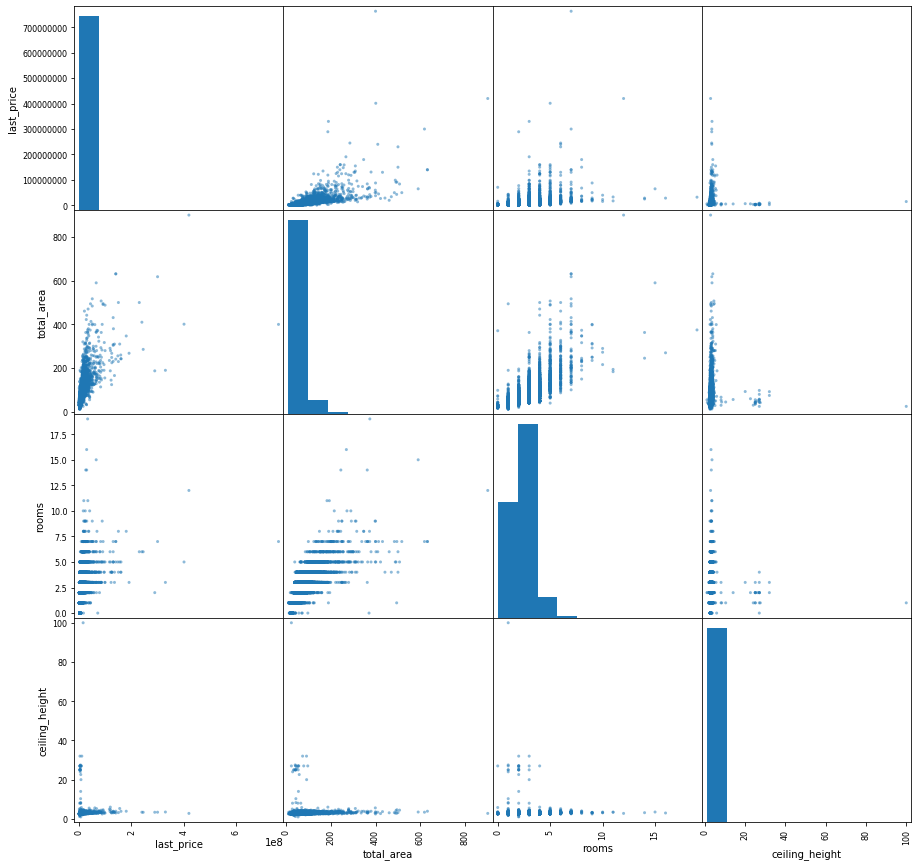

In [ ]:
data['last_price'] = data['last_price'].astype('int')

aprh = data[['last_price', 'total_area', 'rooms', 'ceiling_height']]

print(aprh.head(10))
print('')
print(aprh.corr())
print('')
pd.plotting.scatter_matrix(aprh, figsize = (15, 15))

Посмотрим на матрицу корреляции и матрицу рассеивания.
Судя по информации Высота потолков `ceiling_height` практически никак не связана с остальными параметрами.
Выходит, что Высота потолков будет приятным дополнением к покупке, но как такового влияния на цену не окажет.

Количество комнат `rooms`, что вполне ожидаемо, прамо пропорционально общей площади.
Чем больше комнат, тем больше площадь и связь тут достаточно крепкая.
А вот на цену количество комнат влияет не сильно, скорее косвено.

Ведь очевидно, что главным критерием из представленных, влияющим на цену является Общая площадь `total_area`. 

Так же нужно отметить, что данные сожержат выбросы.
Например, что это за квартира такая с 18тью комнатами?
Общая площадь 700 кв.м?
Высота потолков 100 м и так далее.

Такие выбросы больше похожи на ошибки, чем на правду.
Поэтому можно попробовать отбросить объявления где:

- Высоту потолков более 6 метров
- Количество комнат более 6 штук
- Общая площадь более 200 кв.м
- Последнюю цену выше 25 000000 руб.

                last_price  total_area     rooms  ceiling_height
last_price        1.000000    0.784743  0.487469        0.496091
total_area        0.784743    1.000000  0.783706        0.428374
rooms             0.487469    0.783706  1.000000        0.200801
ceiling_height    0.496091    0.428374  0.200801        1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dcbd477d0>,
      dtype=object)

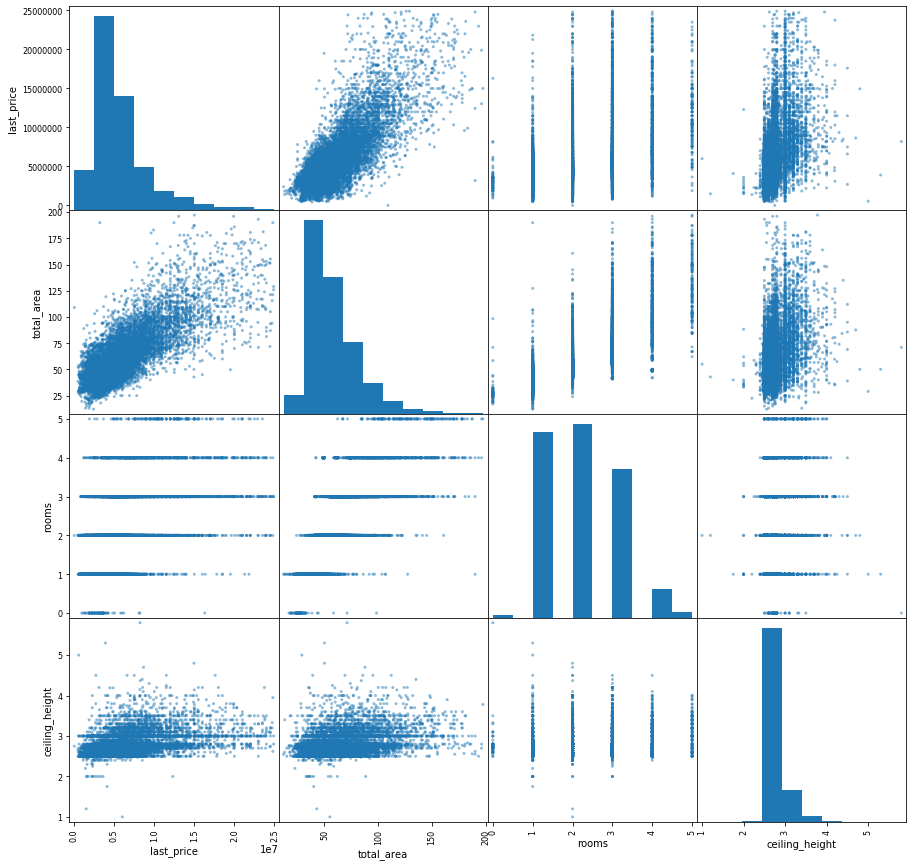

In [ ]:

good_aprh = aprh.query('rooms < 6 and total_area < 200 and ceiling_height < 6 and last_price < 25000000')

print(good_aprh.corr())
print('')
pd.plotting.scatter_matrix(good_aprh, figsize = (15, 15))

После удаления экстремально больших значений стали заметны и экстремально маленькие.
Например, не правдоподобной выглядит высота потолков ниже 2,5 метров.
А также Площадь менее 25 метров и Цена ниже 250000 руб.
Избавимся и от них.

                last_price  total_area     rooms  ceiling_height
last_price        1.000000    0.785342  0.522877        0.449351
total_area        0.785342    1.000000  0.805416        0.400142
rooms             0.522877    0.805416  1.000000        0.248125
ceiling_height    0.449351    0.400142  0.248125        1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dcb11d590>,
      dtype=object)

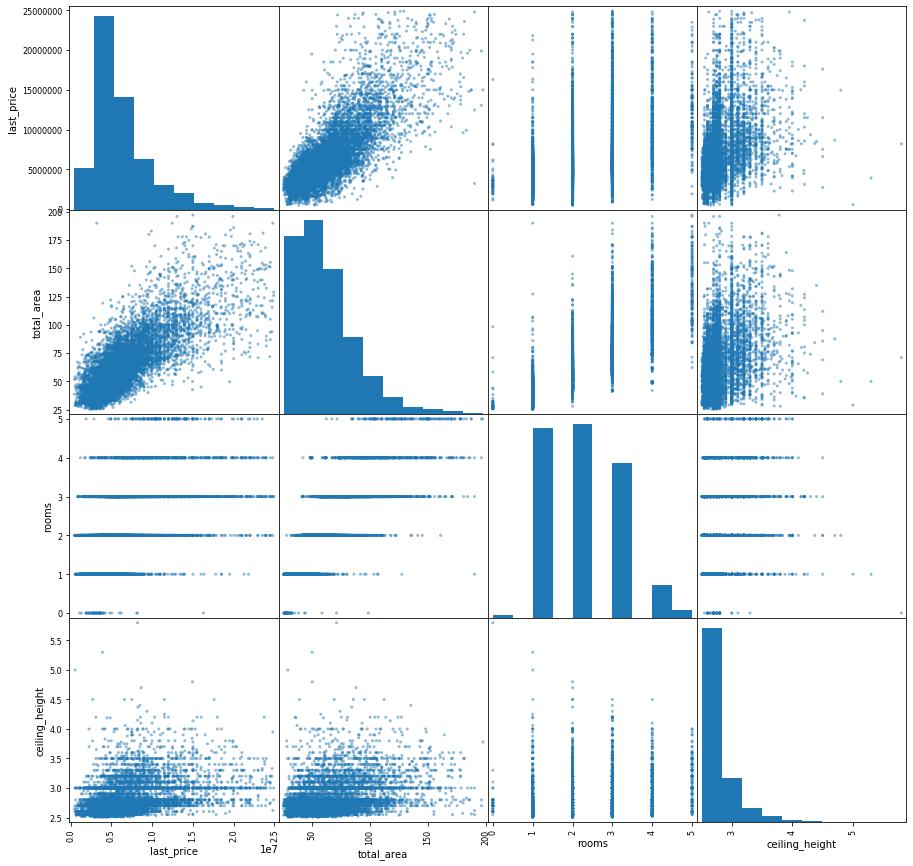

In [ ]:
good_aprh = good_aprh.query('ceiling_height > 2.5 and total_area > 25 and last_price >250000')

print(good_aprh.corr())
print('')
pd.plotting.scatter_matrix(good_aprh, figsize = (15, 15))

Посмотрим, как изменятся наши выводы, после того, как мы избавились от экстремальных значений.
Корреляция высоты потолков с другими параметрами явно стала более ощутимой, однако, все равно не достаточной, чтобы кардинально изменить вывод о ней.
Укрепились наши выводы о том, что количество комнат крепко связано с общей площадью крартиры, но не слишком очевидно, скорее косвенно, влияет на цену.
А Итоговая Стоимость по прежнему напрямую зависит от общей площади квартиры.

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

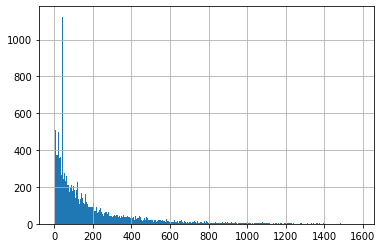

In [ ]:
data['days_exposition'].hist(bins=500)

Заметны резкие пики в начале и длинный хвост аж до 1600 дней, а это почти 4,5 года.
Очень долгие продажи. Экстремальные значения.
По графику заметно, что на значении около 450 дней количество продаж сильно снижается.
Но рассмотрим это поближе.

In [ ]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное время продажи 1 день - это лихо.
Максимальное 1580 - тоже лихо, но это мы уже заметили.
Медиана проходит на 102 днях, а среднее на 185 днях.
В целом звучит правдоподобно.

In [ ]:
data['days_exposition'].value_counts().head(10)

45    879
60    538
7     234
30    208
90    200
4     174
3     157
5     152
14    147
9     142
Name: days_exposition, dtype: int64

Пики продаж находятся на 45, 60, 7 и 30 днях.
Очень интересные цифры. Круглые.
Возможно, сайт снимает объявление с продажи через какое-то время или эти данные округлены.
Но факт остается фактом, что наибольшие продажи будут умещаться примерно в 90 дней.

Теперь построим "коробку с усами".

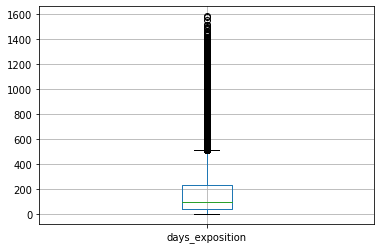

In [ ]:
data.boxplot(column = 'days_exposition')

Из теории о диаграмме размаха, мы знаем, что все что лежит за "усами" - выбросы и от них можно отказаться.
Теперь вполне очевидно, что мы можем отказаться от объявлений, которые продаются более 500 дней.

count    18652.000000
mean       126.907088
std        119.100398
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

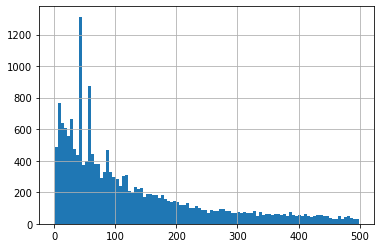

In [ ]:
good_days_exp = data[data['days_exposition'] < 500]['days_exposition']

good_days_exp.hist(bins=100)
good_days_exp.describe()

Все кажется вполне логичным.
Медиана оказалась на ожидаемом уровне 89 дней (3 месяца адекватный срок для прожажи).
Среднее время прождажи 130 дней, чуть больше 4 месяцев.

Таким образоб быстрой можно считать продажу произошедшую в срок менее 40 дней, а если она затянулась на срок более 187 дней (полугода), то это долгая продажа и стоит пересмотреть предложение.

Теперь изучим какие факторы больше всего влияют на стоимость квартиры? 
Зависит ли цена от площади, числа комнат, удалённости от центра? 
Посмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
А также зависимость от даты размещения: дня недели, месяца и года.

Ранее мы выяснили, что Цена хорошо коррелируется с Общей площадью, а вот с количством комнат связь меньше, так как большее число комнат не всегда означает большую площадь.
Мы уже обработали данные и нашли "хорошую" выборку, теперь к нашему исследованию добавим расстояние от центра.

In [ ]:
pas = good_aprh.join(data['cityCenters_nearest'])
pas = pas.drop(columns = ['rooms', 'ceiling_height'])
pas = pas.reset_index(drop=True)
display(pas.head(10))

,last_price,total_area,cityCenters_nearest
0,13000000,108.0,16028
1,10000000,100.0,8098
2,5050000,39.6,13878
3,3550000,42.8,33058
4,6700000,82.0,10698
5,14200000,121.0,12843
6,6120000,80.0,19311
7,5000000,58.0,NaN
8,2950000,32.0,14211
9,6800000,76.0,14640


Посмотрим о чем нам расскажет столбец содержащий расстрояние до центра.

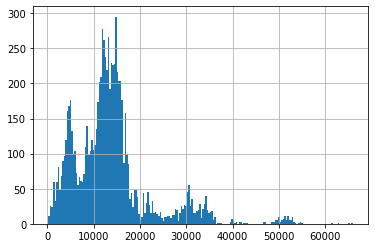

In [ ]:
pas['cityCenters_nearest'].hist(bins = 200)

На графике отчетливо видны скопления - я полагаю это города, районы с большим количеством домов, а между ними заселение менее плотное.
Данные после 35 км от центра хочется убрать, как хвост.
Но сначала давайте орбатимся к "коробке с усами" для того, чтобы удостовериться.

count     8478.000000
mean     13632.343123
std       8482.737999
min        208.000000
25%       8466.500000
50%      12729.000000
75%      15746.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

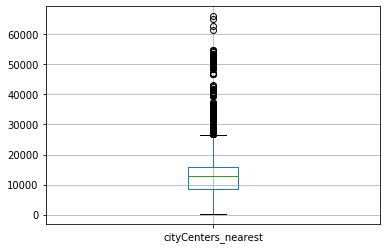

In [ ]:
pas.boxplot(column = 'cityCenters_nearest')
pas['cityCenters_nearest'].describe()

Действительно, 75% обхявлений укладывается в зону 15км от центра.
А все что за пределами даже 25 км можно считать выбросом.
Пока мы исследуем всю Ленинградскую область и не будем избавляться от выбросов. Просто заметим, что после 25 км от цетра города количество объявлений минимально.

Теперь построим матрицу рассеивания и корреляции для новой таблицы.

                     last_price  total_area  cityCenters_nearest
last_price             1.000000    0.805276            -0.344552
total_area             0.805276    1.000000            -0.211804
cityCenters_nearest   -0.344552   -0.211804             1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dbbbc1b90>,
      dtype=object)

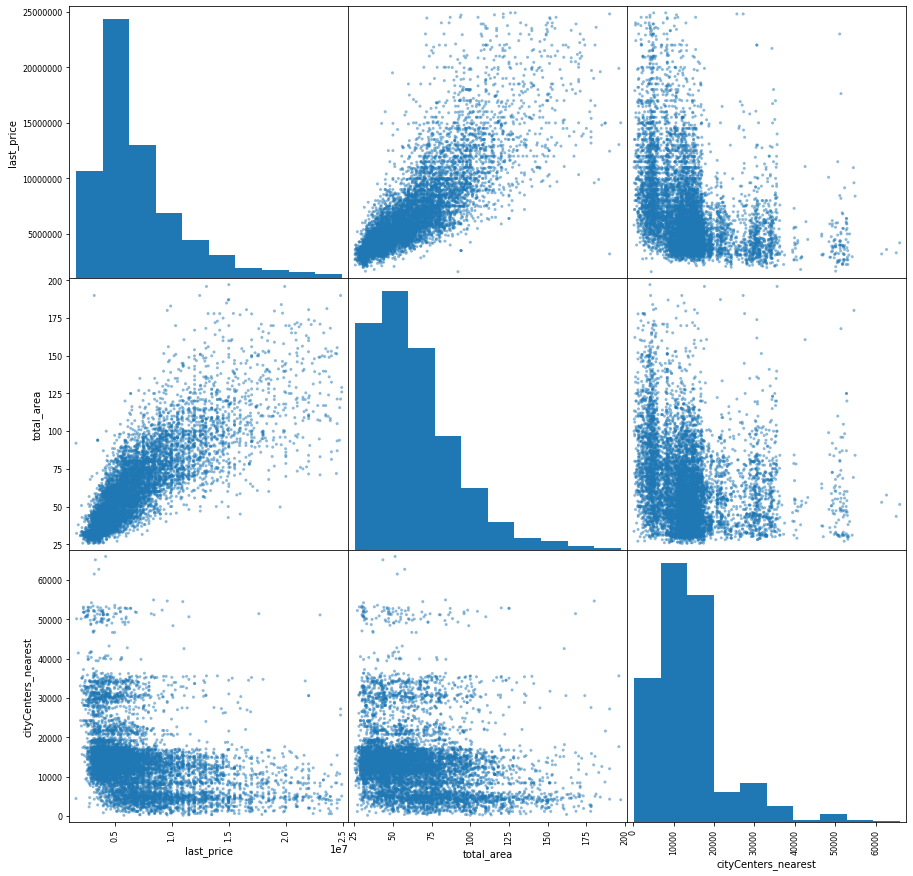

In [ ]:
good_pas = pas[pas['cityCenters_nearest'].isna() == False]
good_pas = good_pas.reset_index(drop=True)
good_pas['cityCenters_nearest'] = good_pas['cityCenters_nearest'].astype('int')


print(good_pas.corr())
print('')
pd.plotting.scatter_matrix(good_pas, figsize = (15, 15))

Данные по цене и площади мы уже изучали, сейчас нас интересует Расстояние до центра.
Зависимость Расстояния до центра обратно пропорциональна и Цене, и Общей площади. 
Это удивительно, но выходит, что чем дальше от центра, тем квартиры меньше.
Однако, надо уточнить, что связь это весьма слабая.
И тут новое удивление - неужели расстояние до центра, так слабо внияет на цену? - Вернемся к этому позже.

Теперь посмотрим, как влияет на цену Этаж квартиры.

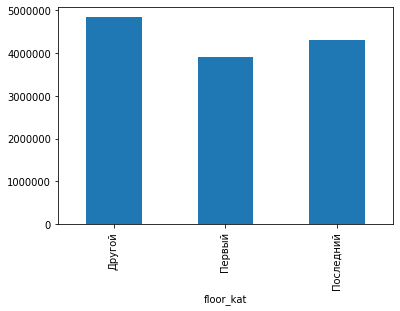

In [ ]:
data.groupby('floor_kat')['last_price'].median().plot(kind='bar')

Первые и поаледние этажи покупатели не любят. А вот любые другие ценят выше и готовы преобретать за большие цены.

Теперь разберемся, как на цену влияют День недели, Месяц и Год, когда разместили объявление.

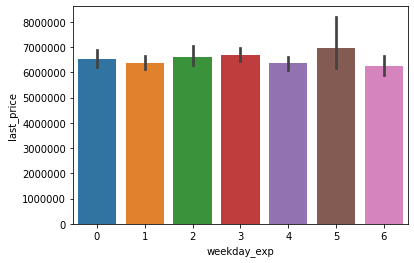

In [ ]:
price_data=data[['last_price', 'weekday_exp', 'month_exp', 'year_exp']]

import seaborn
seaborn.barplot(x=price_data['weekday_exp'], y=price_data['last_price'])

Картина в целом равномернее, но стоит заметить, что квартиры размещенные в продажу по понедельникам и четвергам продаются дороже.

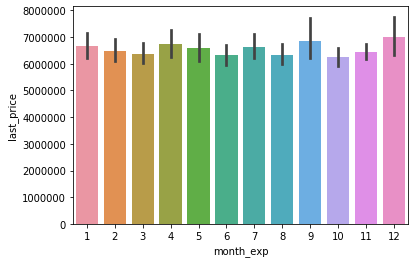

In [ ]:
seaborn.barplot(x=price_data['month_exp'], y=price_data['last_price'])

Смотря на график зависимости цены от месяца размещения объявления очевидно, что размещая объявление в декабре и октябре итоговая цена продажи вышедругих мессяцев.

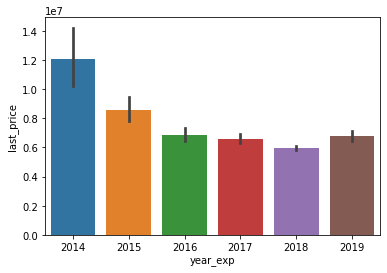

In [ ]:
seaborn.barplot(x=price_data['year_exp'], y=price_data['last_price'])

И наконец, годы.
Явный пик приходится на 2014 год, в этом году квартиры продавались явно дороже, чем в остальные года.

Но будем двигаться дальше.
Выберем 10 населеных пунктов в наиболее большим числом объявлений.

In [ ]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Из рейтинга видно, что лидирующие позиции занимают города:

Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, Гатчина, посёлок Парголово, деревня Кудрово, Петергоф.

С этими населенными пунктами и будем дальше работать.

In [ ]:
top10_locality = data[['locality_name', 'price_square_meter']] 
top10_locality = top10_locality.query('locality_name == "Санкт-Петербург" or locality_name == "посёлок Мурино" or locality_name == "посёлок Шушары" or locality_name == "Всеволожск" or locality_name == "Пушкин" or locality_name == "Колпино" or locality_name == "Гатчина" or locality_name == "посёлок Парголово" or locality_name == "деревня Кудрово" or locality_name == "Петергоф"')

display(top10_locality.head(10))


,locality_name,price_square_meter
0,Санкт-Петербург,120370.0
1,посёлок Шушары,82921.0
2,Санкт-Петербург,92786.0
3,Санкт-Петербург,408176.0
4,Санкт-Петербург,100000.0
6,посёлок Парголово,99196.0
7,Санкт-Петербург,110545.0
8,посёлок Мурино,87455.0
9,Санкт-Петербург,88525.0
10,Санкт-Петербург,127525.0


Наша задача посчитать среднюю цену квадратного метра в этих населённых пунктах и выделить населённые пункты с самой высокой и низкой стоимостью жилья.
Для этого сгрупперуем населенные пункты по названиям и посчитаем необходимые величины.

In [ ]:
top10_locality.groupby('locality_name').mean().sort_values(by = 'price_square_meter', ascending = False).round(2)

,price_square_meter
locality_name,
Санкт-Петербург,114868.87
Пушкин,103125.82
деревня Кудрово,92473.59
посёлок Парголово,90175.89
посёлок Мурино,85673.25
Петергоф,84757.53
посёлок Шушары,78551.36
Колпино,75424.57
Гатчина,68746.11


По выведеным данным наглядно понятно, что самым дорогим по жилью является Санкт-Петербург, что ожидаемо.
А самая низкая стоимость квартир будет в Гатчине и Всеволожске.

Теперь выделим и изучим квартиры находящиеся исключительно в Санкт-Петербурге.
Наша задача — выяснить, какая область входит в центр.

Соберем таблицу содержащую информацию только об объявлений из Санкт-Петербурга для цен и расстояния до центра. А также сосдадим новый столбец в который запишем расстояние до центра в километрах.

In [ ]:
spb_centr = data[['locality_name', 'cityCenters_nearest', 'last_price']]
spb_centr = spb_centr.query('locality_name == "Санкт-Петербург"')
spb_centr['cityCenters_nearest_km'] = (spb_centr['cityCenters_nearest']/1000).round(0)
display(spb_centr.head())

,locality_name,cityCenters_nearest,last_price,cityCenters_nearest_km
0,Санкт-Петербург,16028,13000000,16.0
2,Санкт-Петербург,13933,5196000,14.0
3,Санкт-Петербург,6800,64900000,7.0
4,Санкт-Петербург,8098,10000000,8.0
7,Санкт-Петербург,11634,7915000,12.0


Ранее мы уже исследовали зависимость удаленности от центра и цены продажи квартиры. В тот момент мы поняли лишь то, что эти величины обратно пропорциональны, но корреляция между ними была не велика.
Теперь зайдем с другой стороны и расчитаем среднюю цену за каждый километр, представим все это наглядно на графике.

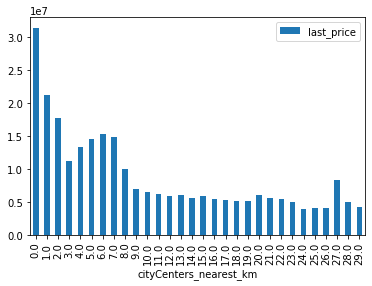

In [ ]:
spb_centr.pivot_table(index='cityCenters_nearest_km', values = 'last_price', aggfunc = ('mean')).plot( kind='bar')

Вот теперь зависимость очевидна. Более того, четко прослеживатеся, что после 3 километра средняя цена за квадратный метр резко снижается. Затем повышается вновь, но это можно объяснить застройкой новых районов с более просторными и современными планировками и лучшим видом.
Поэтому я прадлагаю выделить зону центра в радиусе 3 км от центра города.

Теперь выделим в отдельную таблицу объявления о квартирах исключительно из центра и проанализируем их.
Посмотрим, будут ли отличаться наши выводы от тех, что мы сделали ранее по всем объявлениям.

Для начала изучим такие параметры как: площадь, цена, число комнат, высота потолков.
Из ранее обраотаных данных возьмем лишь те, что входят в зону центра.

                last_price  total_area     rooms  ceiling_height
last_price        1.000000    0.632336  0.325539        0.201812
total_area        0.632336    1.000000  0.736027        0.128383
rooms             0.325539    0.736027  1.000000       -0.040596
ceiling_height    0.201812    0.128383 -0.040596        1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9d2ec990>,
      dtype=object)

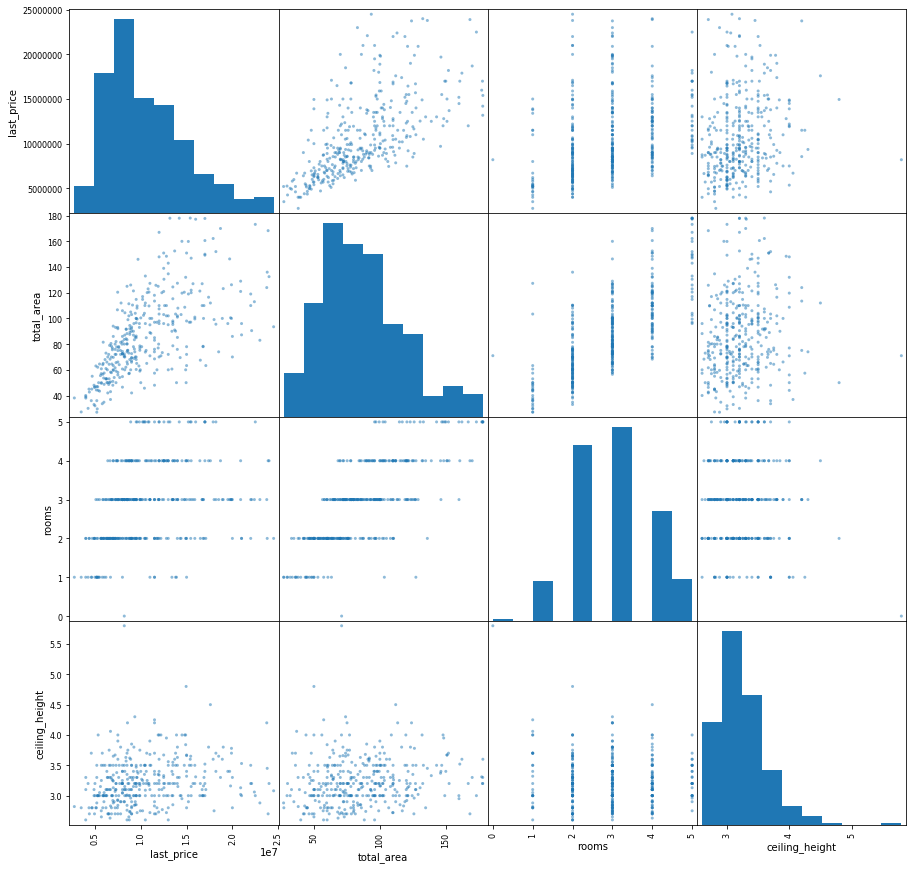

In [ ]:
centr_flats_aprh = good_aprh
centr_flats_aprh = centr_flats_aprh.join(data['cityCenters_nearest'])
centr_flats_aprh = centr_flats_aprh.query('cityCenters_nearest < 3000')
centr_flats_aprh = centr_flats_aprh.drop(columns = ['cityCenters_nearest'])

print(centr_flats_aprh.corr())
print('')
pd.plotting.scatter_matrix(centr_flats_aprh, figsize = (15, 15))

По этим данным ситуация не отличается от общего анализа объявляний. Все так же наибольшее влияние на цену имеет оюбщая площадь квартиры.

Рассмотрим подробнее как изменяется цена в зависимости от количества комнат.

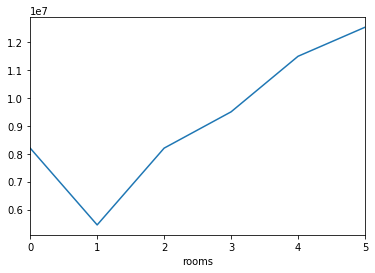

In [ ]:
centr_flats_aprh.groupby('rooms')['last_price'].median().plot()

И если в общей массе объявлений цена плавно увелицивается в зависимоти от увеличения комнат, то в выборке по центру мы видим, что цена за квартиры с 0 комнат находится на уровне 2 комнатной картиры.
Этому может быть объяснение - это квартиры свободной планировки, студии или возможно просто ошибка и не заполненые данные и на самом деле количество комнат и цена этих квартир очень разнородна.

В остальном, если рассматривать квартиры от 1 до 5 комнат, то цена по прежнему плавно увеличивается.

Теперь посмотрим, как обстоят дела с удалением от центра.

                     last_price  total_area  cityCenters_nearest
last_price             1.000000    0.697778            -0.156204
total_area             0.697778    1.000000            -0.203622
cityCenters_nearest   -0.156204   -0.203622             1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9cc57490>,
      dtype=object)

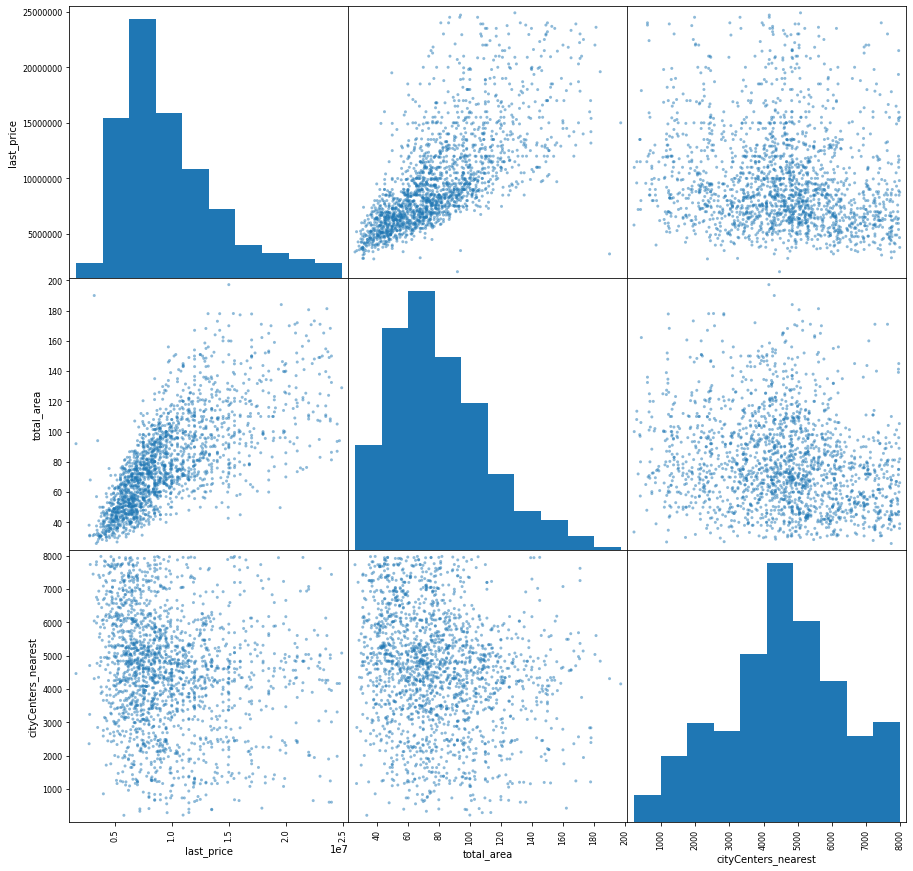

In [ ]:
centr_pas = good_pas[good_pas['cityCenters_nearest']<8000]

print(centr_pas.corr())
print('')
pd.plotting.scatter_matrix(centr_pas, figsize = (15, 15))

И тут тенденция сохраняется тоже.
Чем меньше расстояние до центра, тем выше цена и больше площадь.
Однако, корреляция расстояния и цены по прежнему не велика.
Но мы помним, что в прошлый раз, для анализа нам помог растет среднего и медианы на каждый килоиметр.
Посмотрим как это выглядит в пределах центра.

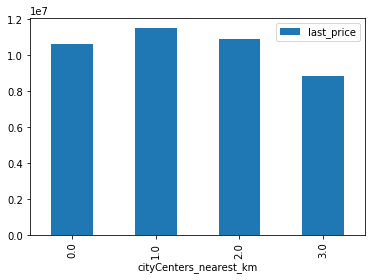

In [ ]:
centr_flats_aprh = centr_flats_aprh.join(spb_centr['cityCenters_nearest_km'])
centr_flats_aprh.pivot_table(index='cityCenters_nearest_km', values = 'last_price', aggfunc = ('mean')).plot( kind='bar')


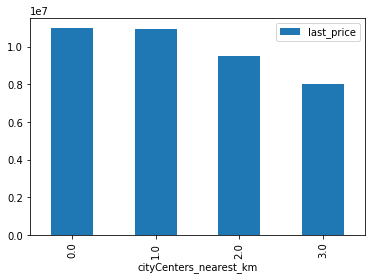

In [ ]:
centr_flats_aprh.pivot_table(index='cityCenters_nearest_km', values = 'last_price', aggfunc = ('median')).plot( kind='bar')


Тенденция средней цены в центре в целом не отличается от общей картины.
Чем ближе к центру, тем больше цена на квартиру.

А как влияет на цену в центре этаж - давайте посмотрим.

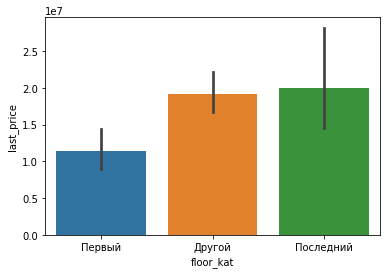

In [ ]:
price_floor_centr = data[['cityCenters_nearest', 'floor_kat', 'last_price']]
price_floor_centr = price_floor_centr.query('cityCenters_nearest < 3000')
price_floor_centr = price_floor_centr.drop(columns = ['cityCenters_nearest'])

seaborn.barplot(x=price_floor_centr['floor_kat'], y=price_floor_centr['last_price'])

И по медиане.

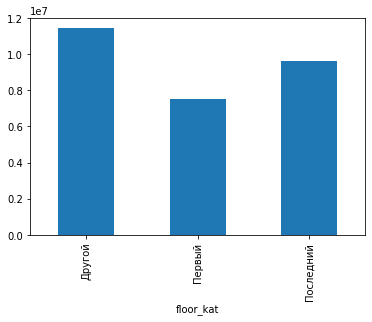

In [ ]:

price_floor_centr.groupby('floor_kat')['last_price'].median().plot(kind='bar')

Влияние этажа никак не отличается от общей картиры.
Самые дорогие - пенхаусы, а самые дешевые - первые этажи.

А вот если считать по медиане, то самыми дорогими будут квартиры на "других" этажах, а первый и последний - ценят меньше. Что больше похоже на правду и пентхаусы не сбивают нас с толку.

Возможно есть отличия по датам публикации?
Давайте проверим.
Построим график цены по дням недели.

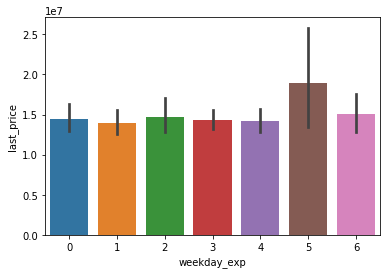

In [ ]:
price_data_centr = price_data.join(data['cityCenters_nearest'])
price_data_centr = price_data_centr.query('cityCenters_nearest < 8000')
price_data_centr = price_data_centr.drop(columns = ['cityCenters_nearest'])
#display(price_data_centr)

seaborn.barplot(x=price_data_centr['weekday_exp'], y=price_data_centr['last_price'])

В цетре Санкт-Петербурга дороже всего продаются объявления опубликованные по субботам, а в общей выборке лидировали понедельники и четверги.

Теперь проанализируем месяца публикации объявления и цену продажи.

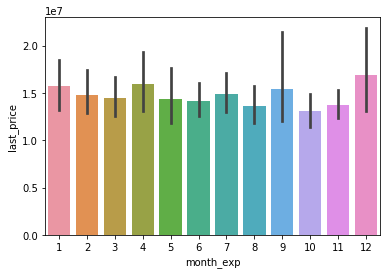

In [ ]:
seaborn.barplot(x=price_data_centr['month_exp'], y=price_data_centr['last_price'])

Тут так же как и в общей выборке лидируют декабрь и апрель. Без изменений.

Проанализируем годы публикации.

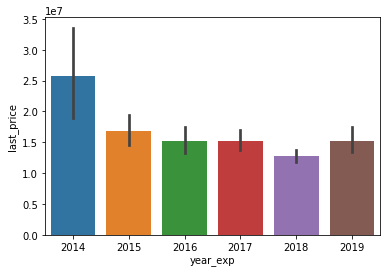

In [ ]:
seaborn.barplot(x=price_data_centr['year_exp'], y=price_data_centr['last_price'])

По годам тоже изменений нет. 
Все так же самые дорогие продажи были в 201 году.

В общем и целом, можно отметить, что анализ центра Санкт-Петербурга и окрестностей показало, что выводы по данным практически не отличаются. 
Тенденции обнаруженные на общих данных прослеживаются так же и для центра.

## Общий вывод

Я провела исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо было понять как определять рыночную стоимость объектов недвижимости. Установить параметры, которые наиболее сильно влияют на определение цены.
Однозначным выводом можно сказать, что это общая площадь недвижимости, а значит, что удачнее всего рыночную стоимость квартиры расчитывать по стоимости кврадратного места в данном населенном пункте или районе.

Также определенный процент цены можно добавлять квартирам не на первом этаже, чуть больше для пенхаусов.
Расстояние до центра, конечно, тоже имеет место быть. Этот параметр необходимо закладывать в стоимость квадратного метра жилья для конкретного города или района.

Остальные параметры могут быть приятным дополнением, но не определяют прямого влияние на рыночную цену недвижимости.